# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [26]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_test = X_train / 255.0, X_test / 255.0  #to bring the samples in a range of 0 to 1 
print(X_train.shape)
print(X_train.size)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 5)
400
(20, 5)
(80,)
(20,)


## Visualize Dataset
This is the same code from Assignment 1

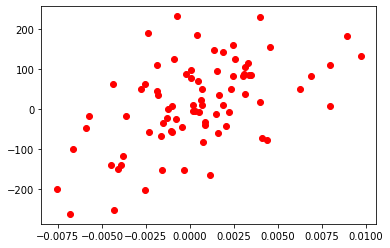

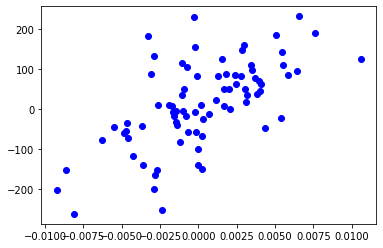

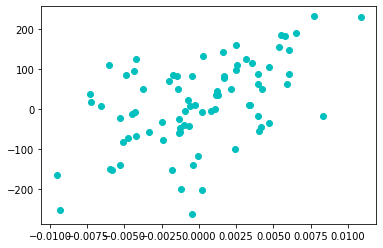

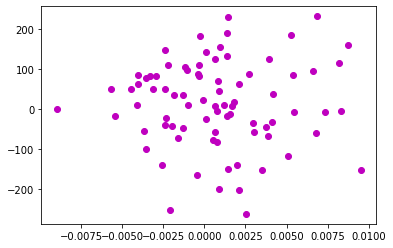

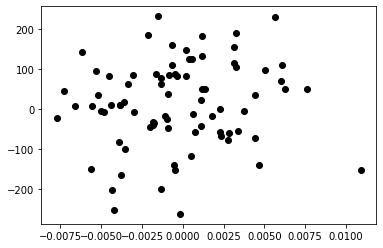

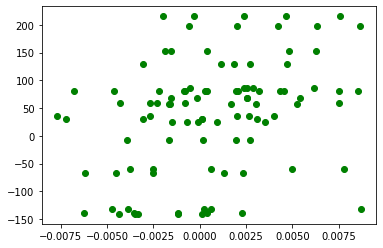

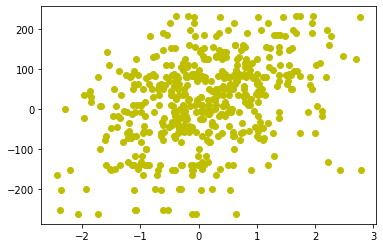

In [27]:
import matplotlib.pyplot as plt

plt.plot(X_train[0:8000,0],y_train, 'o r')
plt.show()
plt.plot(X_train[0:8000,1],y_train, 'o b')
plt.show()
plt.plot(X_train[0:8000,2],y_train, 'o c')
plt.show()
plt.plot(X_train[0:8000,3],y_train, 'o m')
plt.show()
plt.plot(X_train[0:8000,4],y_train, 'o k')
plt.show()
plt.plot(X_test,y_test, 'o g')
plt.show()
plt.plot(X,y, 'o y')
plt.show()

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [37]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers

# Your code here
model = tf.keras.models.Sequential([      
  tf.keras.layers.Dense(5),                       #hidden layer
  tf.keras.layers.Dense(5),                       #hidden layer
  tf.keras.layers.Dense(1)                        #output layer
])

optim=tf.keras.optimizers.SGD(clipvalue=3)
model.compile(optimizer=optim,
              loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=200,validation_data=(X_test, y_test), verbose=2)
train_mse = model.evaluate(X_train, y_train, verbose=2)
test_mse = model.evaluate(X_test, y_test, verbose=2)
print((train_mse, test_mse))


Epoch 1/200
250/250 - 1s - loss: 13780.7305 - val_loss: 13906.7598 - 552ms/epoch - 2ms/step
Epoch 2/200
250/250 - 0s - loss: 11027.6582 - val_loss: 5485.7568 - 256ms/epoch - 1ms/step
Epoch 3/200
250/250 - 0s - loss: 1616.2451 - val_loss: 1713.4545 - 258ms/epoch - 1ms/step
Epoch 4/200
250/250 - 0s - loss: 768.9679 - val_loss: 1169.3634 - 259ms/epoch - 1ms/step
Epoch 5/200
250/250 - 0s - loss: 537.5352 - val_loss: 785.6177 - 253ms/epoch - 1ms/step
Epoch 6/200
250/250 - 0s - loss: 391.8484 - val_loss: 563.5265 - 257ms/epoch - 1ms/step
Epoch 7/200
250/250 - 0s - loss: 309.6421 - val_loss: 411.9932 - 255ms/epoch - 1ms/step
Epoch 8/200
250/250 - 0s - loss: 242.9436 - val_loss: 302.4657 - 253ms/epoch - 1ms/step
Epoch 9/200
250/250 - 0s - loss: 202.6954 - val_loss: 217.0942 - 238ms/epoch - 951us/step
Epoch 10/200
250/250 - 0s - loss: 178.4311 - val_loss: 186.3521 - 236ms/epoch - 945us/step
Epoch 11/200
250/250 - 0s - loss: 163.8067 - val_loss: 166.2284 - 264ms/epoch - 1ms/step
Epoch 12/200
250

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

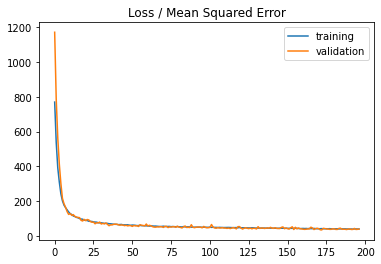

In [38]:
# Your code here
plt.title('Loss / Mean Squared Error')
a_loss=history.history['loss']
a_loss=a_loss[3:]
b_loss=history.history['val_loss']
b_loss=b_loss[3:]
plt.plot(a_loss, label='training')
plt.plot(b_loss, label='validation')
plt.legend()
plt.show()

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [39]:
# Insert the function for R2 Score
from sklearn.metrics import r2_score
predictions = model(X_test).numpy()
accu = r2_score(y_test, predictions) 
print("Accuracy:", accu)

Accuracy: 0.9970179598829337


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

###The training set of this custom model is the one used in the above part.
####For <b>optimizer</b> I've used-
- Adam
<br>

####For <b>loss function</b> I've used-
- Mean Squared Error
<br>

####For <b>activation function</b> I've used-
- Relu
<br>

>For the last part using matplotlib I've visualised how the loss (both validation and training) is changing with the number of iterations.
<br>
>I've also imported r2_score to *evaluate the performance* of the model.

In [31]:
# Your code here

Epoch 1/100
250/250 - 1s - loss: 13776.3984 - val_loss: 13929.3506 - 629ms/epoch - 3ms/step
Epoch 2/100
250/250 - 0s - loss: 13735.3535 - val_loss: 13851.8301 - 264ms/epoch - 1ms/step
Epoch 3/100
250/250 - 0s - loss: 13591.9082 - val_loss: 13634.6641 - 268ms/epoch - 1ms/step
Epoch 4/100
250/250 - 0s - loss: 13267.9902 - val_loss: 13186.3320 - 262ms/epoch - 1ms/step
Epoch 5/100
250/250 - 0s - loss: 12714.3584 - val_loss: 12487.3516 - 282ms/epoch - 1ms/step
Epoch 6/100
250/250 - 0s - loss: 11862.8779 - val_loss: 11483.9893 - 271ms/epoch - 1ms/step
Epoch 7/100
250/250 - 0s - loss: 10753.8730 - val_loss: 10264.1670 - 267ms/epoch - 1ms/step
Epoch 8/100
250/250 - 0s - loss: 9450.8740 - val_loss: 8857.3965 - 260ms/epoch - 1ms/step
Epoch 9/100
250/250 - 0s - loss: 8006.9663 - val_loss: 7376.6846 - 291ms/epoch - 1ms/step
Epoch 10/100
250/250 - 0s - loss: 6544.7651 - val_loss: 5910.6538 - 265ms/epoch - 1ms/step
Epoch 11/100
250/250 - 0s - loss: 5156.2334 - val_loss: 4576.5127 - 281ms/epoch - 1ms

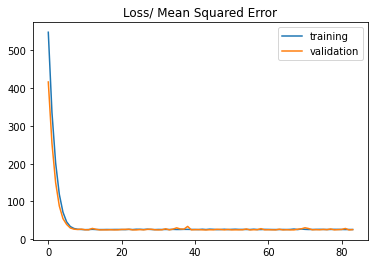

Accuracy: 0.9981765327700428


In [36]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers

# Generate the data
X, y = datasets.make_regression(n_samples=10000, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

X_train= X_train / 255.0  #to bring the samples in a range of 0 to 1 
X_test = X_test / 255.0   #to bring the samples in a range of 0 to 1 

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(28,activation='relu'),                       #hidden layer
  tf.keras.layers.Dense(10),                        #hidden layer
  tf.keras.layers.Dense(1)                         #output layer
])

model.compile(optimizer='adam',
              loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test), verbose=2)
train_mse = model.evaluate(X_train, y_train, verbose=2)
test_mse = model.evaluate(X_test, y_test, verbose=2)

print(test_mse)
print(test_mse)
plt.title('Loss/ Mean Squared Error')
a_loss=history.history['loss']
a_loss=a_loss[16:]
b_loss=history.history['val_loss']
b_loss=b_loss[16:]
plt.plot(a_loss, label='training')
plt.plot(b_loss, label='validation')
plt.legend()
plt.show()

from sklearn.metrics import r2_score
predictions = model(X_test).numpy()

accu = r2_score(y_test, predictions) 
print("Accuracy:", accu)